In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
dt = pd.read_excel('Gene Clinical.xlsx',index_col=0)


In [4]:
dt.shape

(517, 15154)

In [5]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,0,0,0,1,0,1,0,1,0,50.03


In [6]:
del dt['Column1']
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']
dt.shape

(517, 15151)

In [7]:
X = dt.iloc[:,0:15150].values
y = dt.iloc[:, -1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [10]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [11]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [12]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [13]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.4108 - mean_absolute_error: 0.8088
Epoch 2/10
297/297 [==============================] - 0s 648us/sample - loss: 0.9817 - mean_absolute_error: 0.6692
Epoch 3/10
297/297 [==============================] - 0s 662us/sample - loss: 0.5681 - mean_absolute_error: 0.5194
Epoch 4/10
297/297 [==============================] - 0s 677us/sample - loss: 0.7263 - mean_absolute_error: 0.4735
Epoch 5/10
297/297 [==============================] - 0s 668us/sample - loss: 0.3549 - mean_absolute_error: 0.3123
Epoch 6/10
297/297 [==============================] - 0s 662us/sample - loss: 0.1652 - mean_absolute_error: 0.2518
Epoch 7/10
297/297 [==============================] - 0s 663us/sample - loss: 0.3097 - mean_absolute_error: 0.2765
Epoch 8/10
297/297 [==============================] - 0s 666us/sample - loss: 0.1707 - mean_absolute_error: 0.2145
Epoch 9/10
297/297 [==============================] - 0s 672us/sample - loss: 0.10

297/297 [==============================] - 0s 707us/sample - loss: 0.3508 - mean_absolute_error: 0.4121
Epoch 8/10
297/297 [==============================] - 0s 709us/sample - loss: 0.3342 - mean_absolute_error: 0.3043
Epoch 9/10
297/297 [==============================] - 0s 712us/sample - loss: 0.1165 - mean_absolute_error: 0.2226
Epoch 10/10
33/33 [==============================] - 0s 1ms/sample - loss: 1.5542 - mean_absolute_error: 0.7528
Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.3737 - mean_absolute_error: 0.7973
Epoch 2/10
297/297 [==============================] - 0s 638us/sample - loss: 0.9471 - mean_absolute_error: 0.6766
Epoch 3/10
297/297 [==============================] - 0s 637us/sample - loss: 0.6440 - mean_absolute_error: 0.5637
Epoch 4/10
297/297 [==============================] - 0s 642us/sample - loss: 0.3868 - mean_absolute_error: 0.3848
Epoch 5/10
297/297 [==============================] - 0s 643us/sample - loss: 0.2797 - mean_abso

In [14]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.3936 - mean_absolute_error: 0.8119
Epoch 2/10
330/330 [==============================] - 0s 683us/sample - loss: 0.9014 - mean_absolute_error: 0.6295
Epoch 3/10
330/330 [==============================] - 0s 698us/sample - loss: 0.7150 - mean_absolute_error: 0.5706
Epoch 4/10
330/330 [==============================] - 0s 691us/sample - loss: 0.3824 - mean_absolute_error: 0.4092
Epoch 5/10
330/330 [==============================] - 0s 659us/sample - loss: 0.3762 - mean_absolute_error: 0.3330
Epoch 6/10
330/330 [==============================] - 0s 687us/sample - loss: 0.1779 - mean_absolute_error: 0.2740
Epoch 7/10
330/330 [==============================] - 0s 676us/sample - loss: 0.2362 - mean_absolute_error: 0.2505
Epoch 8/10
330/330 [==============================] - 0s 677us/sample - loss: 0.3612 - mean_absolute_error: 0.2863
Epoch 9/10
330/330 [==============================] - 0s 693us/sample - loss: 0.15

In [15]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 320us/sample


In [16]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

53562284883771.195
6.306005498110004e+28
251117611849706.88
R2 Score
-8.84517256162608e+28


R^2 = -88451725616260807196147712000.0000


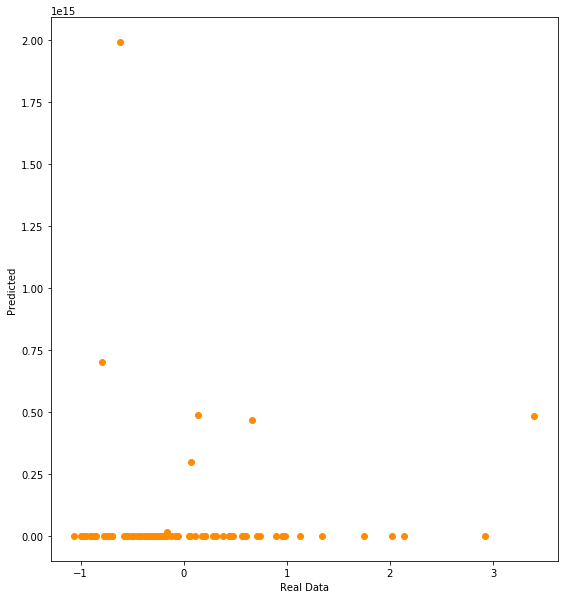

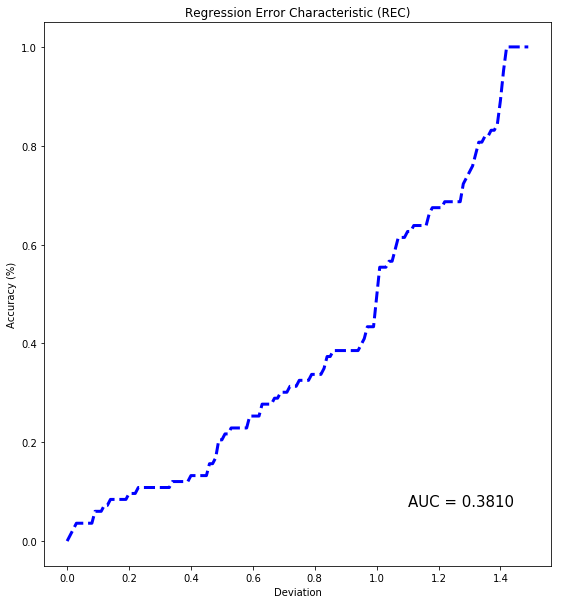

In [18]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [19]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20]
epochs = [10, 20,30,40]

In [20]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 1s 3ms/sample - loss: 1.6106 - mean_absolute_error: 0.8540
Epoch 2/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.9845 - mean_absolute_error: 0.6910
Epoch 3/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.5934 - mean_absolute_error: 0.5418
Epoch 4/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.9267 - mean_absolute_error: 0.5909
Epoch 5/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.9829 - mean_absolute_error: 0.5856
Epoch 6/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.6028 - mean_absolute_error: 0.4520
Epoch 7/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.5007 - mean_absolute_error: 0.4103
Epoch 8/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.6245 - mean_absolute_error: 0.3834
Epoch 9/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.3095 - mean_absolu

Epoch 16/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0630 - mean_absolute_error: 0.1234
Epoch 17/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.1266 - mean_absolute_error: 0.1338
Epoch 18/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0952 - mean_absolute_error: 0.1203
Epoch 19/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0438 - mean_absolute_error: 0.1166
Epoch 20/20
220/220 [==============================] - 0s 338us/sample - loss: 0.0319 - mean_absolute_error: 0.0946
Epoch 1/20
220/220 [==============================] - 1s 2ms/sample - loss: 2.0526 - mean_absolute_error: 1.0413
Epoch 2/20
220/220 [==============================] - 0s 2ms/sample - loss: 1.6217 - mean_absolute_error: 0.8417
Epoch 3/20
220/220 [==============================] - 0s 2ms/sample - loss: 1.3013 - mean_absolute_error: 0.7545
Epoch 4/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.8830 - mean

220/220 [==============================] - 0s 2ms/sample - loss: 0.0952 - mean_absolute_error: 0.1756
Epoch 13/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.1668 - mean_absolute_error: 0.2172
Epoch 14/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0871 - mean_absolute_error: 0.1678
Epoch 15/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0982 - mean_absolute_error: 0.1531
Epoch 16/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.1401 - mean_absolute_error: 0.1474
Epoch 17/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0736 - mean_absolute_error: 0.1419
Epoch 18/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0528 - mean_absolute_error: 0.1153
Epoch 19/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0980 - mean_absolute_error: 0.1120
Epoch 20/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0607 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.2598 - mean_absolute_error: 0.1379
Epoch 21/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1651 - mean_absolute_error: 0.1029
Epoch 22/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0722 - mean_absolute_error: 0.0892
Epoch 23/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0447 - mean_absolute_error: 0.1020
Epoch 24/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1930 - mean_absolute_error: 0.1519
Epoch 25/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1209 - mean_absolute_error: 0.1605
Epoch 26/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0974 - mean_absolute_error: 0.1224
Epoch 27/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0568 - mean_absolute_error: 0.1018
Epoch 28/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0472 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.3693 - mean_absolute_error: 0.3624
Epoch 9/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.5072 - mean_absolute_error: 0.3310
Epoch 10/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.5008 - mean_absolute_error: 0.4136
Epoch 11/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1728 - mean_absolute_error: 0.2729
Epoch 12/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3063 - mean_absolute_error: 0.2653
Epoch 13/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4002 - mean_absolute_error: 0.2287
Epoch 14/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2211 - mean_absolute_error: 0.1918
Epoch 15/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1619 - mean_absolute_error: 0.2179
Epoch 16/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2445 - mean_absolute_e

220/220 [==============================] - 0s 924us/sample - loss: 0.9106 - mean_absolute_error: 0.6297
Epoch 3/20
220/220 [==============================] - 0s 933us/sample - loss: 0.9020 - mean_absolute_error: 0.6017
Epoch 4/20
220/220 [==============================] - 0s 928us/sample - loss: 0.4559 - mean_absolute_error: 0.4744
Epoch 5/20
220/220 [==============================] - 0s 926us/sample - loss: 0.8976 - mean_absolute_error: 0.4997
Epoch 6/20
220/220 [==============================] - 0s 913us/sample - loss: 0.7624 - mean_absolute_error: 0.5204
Epoch 7/20
220/220 [==============================] - 0s 922us/sample - loss: 0.3273 - mean_absolute_error: 0.3518
Epoch 8/20
220/220 [==============================] - 0s 961us/sample - loss: 0.2608 - mean_absolute_error: 0.2761
Epoch 9/20
220/220 [==============================] - 0s 923us/sample - loss: 0.4704 - mean_absolute_error: 0.2710
Epoch 10/20
220/220 [==============================] - 0s 926us/sample - loss: 0.1490 - mea

220/220 [==============================] - 0s 940us/sample - loss: 0.5275 - mean_absolute_error: 0.3487
Epoch 8/30
220/220 [==============================] - 0s 935us/sample - loss: 0.1642 - mean_absolute_error: 0.2655
Epoch 9/30
220/220 [==============================] - 0s 929us/sample - loss: 0.3730 - mean_absolute_error: 0.3048
Epoch 10/30
220/220 [==============================] - 0s 934us/sample - loss: 0.3442 - mean_absolute_error: 0.2213
Epoch 11/30
220/220 [==============================] - 0s 924us/sample - loss: 0.1937 - mean_absolute_error: 0.2014
Epoch 12/30
220/220 [==============================] - 0s 934us/sample - loss: 0.3668 - mean_absolute_error: 0.2666
Epoch 13/30
220/220 [==============================] - 0s 933us/sample - loss: 0.3719 - mean_absolute_error: 0.2124
Epoch 14/30
220/220 [==============================] - 0s 924us/sample - loss: 0.1412 - mean_absolute_error: 0.2102
Epoch 15/30
220/220 [==============================] - 0s 933us/sample - loss: 0.2427 

220/220 [==============================] - 0s 940us/sample - loss: 0.1940 - mean_absolute_error: 0.1524
Epoch 15/30
220/220 [==============================] - 0s 926us/sample - loss: 0.2089 - mean_absolute_error: 0.1559
Epoch 16/30
220/220 [==============================] - 0s 933us/sample - loss: 0.1351 - mean_absolute_error: 0.1125
Epoch 17/30
220/220 [==============================] - 0s 930us/sample - loss: 0.0166 - mean_absolute_error: 0.0669
Epoch 18/30
220/220 [==============================] - 0s 927us/sample - loss: 0.1722 - mean_absolute_error: 0.1434
Epoch 19/30
220/220 [==============================] - 0s 930us/sample - loss: 0.3033 - mean_absolute_error: 0.1672
Epoch 20/30
220/220 [==============================] - 0s 928us/sample - loss: 0.1795 - mean_absolute_error: 0.1746
Epoch 21/30
220/220 [==============================] - 0s 922us/sample - loss: 0.1295 - mean_absolute_error: 0.1802
Epoch 22/30
220/220 [==============================] - 0s 936us/sample - loss: 0.271

220/220 [==============================] - 0s 952us/sample - loss: 0.0815 - mean_absolute_error: 0.1857
Epoch 12/40
220/220 [==============================] - 0s 930us/sample - loss: 0.0840 - mean_absolute_error: 0.1670
Epoch 13/40
220/220 [==============================] - 0s 929us/sample - loss: 0.1511 - mean_absolute_error: 0.1608
Epoch 14/40
220/220 [==============================] - 0s 928us/sample - loss: 0.0950 - mean_absolute_error: 0.1211
Epoch 15/40
220/220 [==============================] - 0s 932us/sample - loss: 0.0379 - mean_absolute_error: 0.1011
Epoch 16/40
220/220 [==============================] - 0s 932us/sample - loss: 0.0615 - mean_absolute_error: 0.1041
Epoch 17/40
220/220 [==============================] - 0s 924us/sample - loss: 0.0897 - mean_absolute_error: 0.1163
Epoch 18/40
220/220 [==============================] - 0s 931us/sample - loss: 0.0813 - mean_absolute_error: 0.0951
Epoch 19/40
220/220 [==============================] - 0s 929us/sample - loss: 0.031

220/220 [==============================] - 0s 213us/sample - loss: 0.0085 - mean_absolute_error: 0.0436
Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.2981 - mean_absolute_error: 0.7833
Epoch 2/10
220/220 [==============================] - 0s 660us/sample - loss: 0.9961 - mean_absolute_error: 0.6965
Epoch 3/10
220/220 [==============================] - 0s 666us/sample - loss: 0.6303 - mean_absolute_error: 0.5408
Epoch 4/10
220/220 [==============================] - 0s 659us/sample - loss: 0.5947 - mean_absolute_error: 0.4876
Epoch 5/10
220/220 [==============================] - 0s 671us/sample - loss: 0.4156 - mean_absolute_error: 0.4821
Epoch 6/10
220/220 [==============================] - 0s 674us/sample - loss: 0.3845 - mean_absolute_error: 0.3188
Epoch 7/10
220/220 [==============================] - 0s 682us/sample - loss: 0.2416 - mean_absolute_error: 0.2416
Epoch 8/10
220/220 [==============================] - 0s 667us/sample - loss: 0.3939 - mean_a

220/220 [==============================] - 0s 677us/sample - loss: 0.0286 - mean_absolute_error: 0.1032
Epoch 13/20
220/220 [==============================] - 0s 669us/sample - loss: 0.0205 - mean_absolute_error: 0.0986
Epoch 14/20
220/220 [==============================] - 0s 659us/sample - loss: 0.0285 - mean_absolute_error: 0.0935
Epoch 15/20
220/220 [==============================] - 0s 657us/sample - loss: 0.0249 - mean_absolute_error: 0.0874
Epoch 16/20
220/220 [==============================] - 0s 668us/sample - loss: 0.0304 - mean_absolute_error: 0.0862
Epoch 17/20
220/220 [==============================] - 0s 670us/sample - loss: 0.0189 - mean_absolute_error: 0.0985
Epoch 18/20
220/220 [==============================] - 0s 671us/sample - loss: 0.0480 - mean_absolute_error: 0.0900
Epoch 19/20
220/220 [==============================] - 0s 666us/sample - loss: 0.0238 - mean_absolute_error: 0.0998
Epoch 20/20
220/220 [==============================] - 0s 175us/sample - loss: 0.017

220/220 [==============================] - 0s 686us/sample - loss: 0.1083 - mean_absolute_error: 0.2268
Epoch 8/30
220/220 [==============================] - 0s 668us/sample - loss: 0.1633 - mean_absolute_error: 0.2558
Epoch 9/30
220/220 [==============================] - 0s 637us/sample - loss: 0.1720 - mean_absolute_error: 0.1850
Epoch 10/30
220/220 [==============================] - 0s 653us/sample - loss: 0.0866 - mean_absolute_error: 0.1526
Epoch 11/30
220/220 [==============================] - 0s 655us/sample - loss: 0.0628 - mean_absolute_error: 0.1485
Epoch 12/30
220/220 [==============================] - 0s 653us/sample - loss: 0.2249 - mean_absolute_error: 0.2241
Epoch 13/30
220/220 [==============================] - 0s 652us/sample - loss: 0.1887 - mean_absolute_error: 0.2295
Epoch 14/30
220/220 [==============================] - 0s 642us/sample - loss: 0.1131 - mean_absolute_error: 0.1952
Epoch 15/30
220/220 [==============================] - 0s 643us/sample - loss: 0.0707 

220/220 [==============================] - 0s 648us/sample - loss: 0.1304 - mean_absolute_error: 0.1358
Epoch 15/40
220/220 [==============================] - 0s 641us/sample - loss: 0.0412 - mean_absolute_error: 0.1338
Epoch 16/40
220/220 [==============================] - 0s 655us/sample - loss: 0.2475 - mean_absolute_error: 0.1381
Epoch 17/40
220/220 [==============================] - 0s 650us/sample - loss: 0.1269 - mean_absolute_error: 0.1435
Epoch 18/40
220/220 [==============================] - 0s 645us/sample - loss: 0.1835 - mean_absolute_error: 0.1141
Epoch 19/40
220/220 [==============================] - 0s 653us/sample - loss: 0.1277 - mean_absolute_error: 0.0889
Epoch 20/40
220/220 [==============================] - 0s 654us/sample - loss: 0.0126 - mean_absolute_error: 0.0591
Epoch 21/40
220/220 [==============================] - 0s 651us/sample - loss: 0.0065 - mean_absolute_error: 0.0486
Epoch 22/40
220/220 [==============================] - 0s 661us/sample - loss: 0.003

220/220 [==============================] - 0s 1ms/sample - loss: 1.8751 - mean_absolute_error: 0.9276
Epoch 2/40
220/220 [==============================] - 0s 661us/sample - loss: 1.0602 - mean_absolute_error: 0.7089
Epoch 3/40
220/220 [==============================] - 0s 664us/sample - loss: 0.5454 - mean_absolute_error: 0.5358
Epoch 4/40
220/220 [==============================] - 0s 666us/sample - loss: 0.5368 - mean_absolute_error: 0.4894
Epoch 5/40
220/220 [==============================] - 0s 662us/sample - loss: 0.2752 - mean_absolute_error: 0.3859
Epoch 6/40
220/220 [==============================] - 0s 655us/sample - loss: 0.1384 - mean_absolute_error: 0.2579
Epoch 7/40
220/220 [==============================] - 0s 653us/sample - loss: 0.1739 - mean_absolute_error: 0.2256
Epoch 8/40
220/220 [==============================] - 0s 664us/sample - loss: 0.1516 - mean_absolute_error: 0.2214
Epoch 9/40
220/220 [==============================] - 0s 664us/sample - loss: 0.0562 - mean_a

220/220 [==============================] - 0s 527us/sample - loss: 0.1648 - mean_absolute_error: 0.2934
Epoch 7/10
220/220 [==============================] - 0s 506us/sample - loss: 0.1725 - mean_absolute_error: 0.2654
Epoch 8/10
220/220 [==============================] - 0s 511us/sample - loss: 0.0866 - mean_absolute_error: 0.2165
Epoch 9/10
220/220 [==============================] - 0s 510us/sample - loss: 0.0530 - mean_absolute_error: 0.1443
Epoch 10/10
220/220 [==============================] - 0s 153us/sample - loss: 0.0292 - mean_absolute_error: 0.1108
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.4172 - mean_absolute_error: 0.7964
Epoch 2/20
220/220 [==============================] - 0s 500us/sample - loss: 1.1897 - mean_absolute_error: 0.7103
Epoch 3/20
220/220 [==============================] - 0s 505us/sample - loss: 0.5217 - mean_absolute_error: 0.5164
Epoch 4/20
220/220 [==============================] - 0s 505us/sample - loss: 0.3216 - mean_

220/220 [==============================] - 0s 170us/sample - loss: 0.0220 - mean_absolute_error: 0.1101
Epoch 1/30
220/220 [==============================] - 0s 1ms/sample - loss: 1.3856 - mean_absolute_error: 0.7717
Epoch 2/30
220/220 [==============================] - 0s 508us/sample - loss: 1.0164 - mean_absolute_error: 0.6643
Epoch 3/30
220/220 [==============================] - 0s 512us/sample - loss: 0.6758 - mean_absolute_error: 0.5777
Epoch 4/30
220/220 [==============================] - 0s 514us/sample - loss: 0.3299 - mean_absolute_error: 0.3990
Epoch 5/30
220/220 [==============================] - 0s 515us/sample - loss: 0.4317 - mean_absolute_error: 0.3499
Epoch 6/30
220/220 [==============================] - 0s 519us/sample - loss: 0.1451 - mean_absolute_error: 0.2383
Epoch 7/30
220/220 [==============================] - 0s 510us/sample - loss: 0.1945 - mean_absolute_error: 0.2816
Epoch 8/30
220/220 [==============================] - 0s 512us/sample - loss: 0.2186 - mean_a

220/220 [==============================] - 0s 516us/sample - loss: 0.2143 - mean_absolute_error: 0.2788
Epoch 7/30
220/220 [==============================] - 0s 512us/sample - loss: 0.4594 - mean_absolute_error: 0.2850
Epoch 8/30
220/220 [==============================] - 0s 522us/sample - loss: 0.3098 - mean_absolute_error: 0.3109
Epoch 9/30
220/220 [==============================] - 0s 510us/sample - loss: 0.2141 - mean_absolute_error: 0.3301
Epoch 10/30
220/220 [==============================] - 0s 513us/sample - loss: 0.2826 - mean_absolute_error: 0.3015
Epoch 11/30
220/220 [==============================] - 0s 515us/sample - loss: 0.5302 - mean_absolute_error: 0.2929
Epoch 12/30
220/220 [==============================] - 0s 516us/sample - loss: 0.4221 - mean_absolute_error: 0.3327
Epoch 13/30
220/220 [==============================] - 0s 505us/sample - loss: 0.1351 - mean_absolute_error: 0.2008
Epoch 14/30
220/220 [==============================] - 0s 516us/sample - loss: 0.0790 -

220/220 [==============================] - 0s 525us/sample - loss: 0.4039 - mean_absolute_error: 0.4328
Epoch 4/40
220/220 [==============================] - 0s 517us/sample - loss: 0.3367 - mean_absolute_error: 0.3986
Epoch 5/40
220/220 [==============================] - 0s 518us/sample - loss: 0.3083 - mean_absolute_error: 0.3901
Epoch 6/40
220/220 [==============================] - 0s 516us/sample - loss: 0.2751 - mean_absolute_error: 0.3551
Epoch 7/40
220/220 [==============================] - 0s 519us/sample - loss: 0.1228 - mean_absolute_error: 0.2395
Epoch 8/40
220/220 [==============================] - 0s 508us/sample - loss: 0.0595 - mean_absolute_error: 0.1720
Epoch 9/40
220/220 [==============================] - 0s 517us/sample - loss: 0.0858 - mean_absolute_error: 0.1838
Epoch 10/40
220/220 [==============================] - 0s 521us/sample - loss: 0.0496 - mean_absolute_error: 0.1552
Epoch 11/40
220/220 [==============================] - 0s 515us/sample - loss: 0.0302 - me

220/220 [==============================] - 0s 524us/sample - loss: 0.0085 - mean_absolute_error: 0.0344
Epoch 33/40
220/220 [==============================] - 0s 505us/sample - loss: 0.0121 - mean_absolute_error: 0.0359
Epoch 34/40
220/220 [==============================] - 0s 510us/sample - loss: 0.0052 - mean_absolute_error: 0.0364
Epoch 35/40
220/220 [==============================] - 0s 516us/sample - loss: 0.0044 - mean_absolute_error: 0.0341
Epoch 36/40
220/220 [==============================] - 0s 514us/sample - loss: 0.0030 - mean_absolute_error: 0.0317
Epoch 37/40
220/220 [==============================] - 0s 525us/sample - loss: 0.0041 - mean_absolute_error: 0.0337
Epoch 38/40
220/220 [==============================] - 0s 511us/sample - loss: 0.0038 - mean_absolute_error: 0.0327
Epoch 39/40
220/220 [==============================] - 0s 521us/sample - loss: 0.0032 - mean_absolute_error: 0.0344
Epoch 40/40
220/220 [==============================] - 0s 158us/sample - loss: 0.001

In [21]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.047745 using {'batch_size': 15, 'epochs': 30}
-1.179638 (0.373488) with: {'batch_size': 5, 'epochs': 10}
-1.183781 (0.342051) with: {'batch_size': 5, 'epochs': 20}
-1.079225 (0.397733) with: {'batch_size': 5, 'epochs': 30}
-1.149982 (0.323602) with: {'batch_size': 5, 'epochs': 40}
-1.133629 (0.449790) with: {'batch_size': 10, 'epochs': 10}
-1.140361 (0.309592) with: {'batch_size': 10, 'epochs': 20}
-1.149011 (0.394155) with: {'batch_size': 10, 'epochs': 30}
-1.162504 (0.352308) with: {'batch_size': 10, 'epochs': 40}
-1.131563 (0.499930) with: {'batch_size': 15, 'epochs': 10}
-1.259024 (0.349347) with: {'batch_size': 15, 'epochs': 20}
-1.047745 (0.379403) with: {'batch_size': 15, 'epochs': 30}
-1.176585 (0.338444) with: {'batch_size': 15, 'epochs': 40}
-1.105905 (0.362463) with: {'batch_size': 20, 'epochs': 10}
-1.131770 (0.386926) with: {'batch_size': 20, 'epochs': 20}
-1.133006 (0.358794) with: {'batch_size': 20, 'epochs': 30}
-1.131116 (0.364131) with: {'batch_size': 20, 'ep

In [22]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=30, verbose=True)

In [23]:
newmodel.fit(X_train, y_train)

Epoch 1/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.2225 - mean_absolute_error: 0.7923
Epoch 2/30
330/330 [==============================] - 0s 653us/sample - loss: 0.7695 - mean_absolute_error: 0.6119
Epoch 3/30
330/330 [==============================] - 0s 678us/sample - loss: 0.6619 - mean_absolute_error: 0.5118
Epoch 4/30
330/330 [==============================] - 0s 661us/sample - loss: 0.3689 - mean_absolute_error: 0.4016
Epoch 5/30
330/330 [==============================] - 0s 674us/sample - loss: 0.8866 - mean_absolute_error: 0.4319
Epoch 6/30
330/330 [==============================] - 0s 660us/sample - loss: 0.3984 - mean_absolute_error: 0.3606
Epoch 7/30
330/330 [==============================] - 0s 664us/sample - loss: 0.1612 - mean_absolute_error: 0.2685
Epoch 8/30
330/330 [==============================] - 0s 663us/sample - loss: 0.2465 - mean_absolute_error: 0.3116
Epoch 9/30
330/330 [==============================] - 0s 661us/sample - loss: 0.31

In [24]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 299us/sample


In [25]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

18833163460707.258
8.187992602066905e+27
90487527328725.83
R2 Score
-1.1484957873935575e+28


R^2 = -11484957873935575296958791680.0000


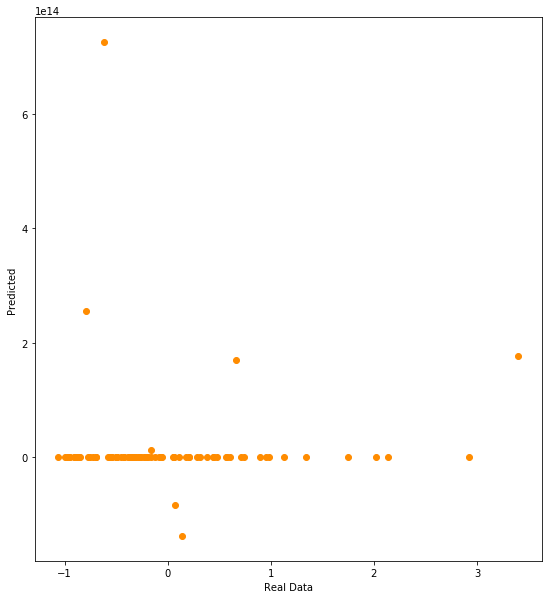

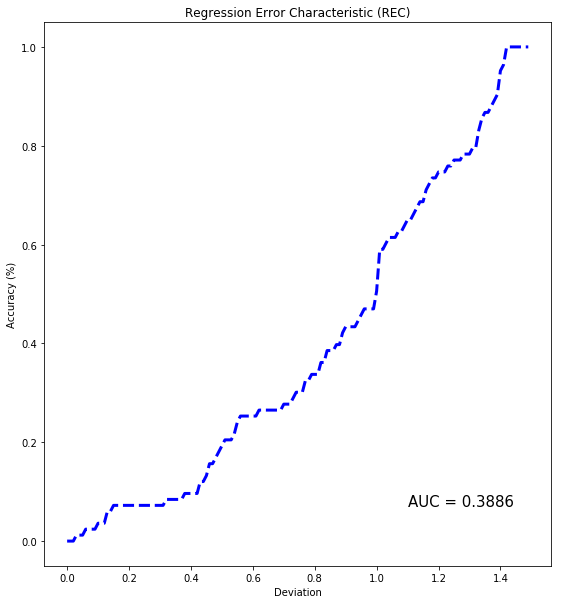

In [26]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()